# Tiền xử lý dữ liệu

## Cài đặt thư viện

In [ ]:
install.packages("dbscan")
install.packages("factoextra")
install.packages("readr")
install.packages("magrittr")
install.packages("tidyverse")
install.packages("cluster")

library(dbscan)
library(factoextra)
library(readr)
library(magrittr)
library(tidyverse)
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/s

## Đọc dữ liệu

In [ ]:
wine <- read.csv("winequality-red - Copy.csv")

In [ ]:
wine

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1     7.4          0.700            0.00        1.9            0.076    
2     7.8          0.880            0.00        2.6            0.098    
3     7.8          0.760            0.04        2.3            0.092    
4    11.2          0.280            0.56        1.9            0.075    
5     7.4          0.700            0.00        1.9            0.076    
6     7.4          0.660            0.00        1.8            0.075    
7     7.9          0.600            0.06        1.6            0.069    
8     7.3          0.650            0.00        1.2            0.065    
9     7.8          0.580            0.02        2.0            0.073    
10    7.5          0.500            0.36        6.1            0.071    
11    6.7          0.580            0.08        1.8            0.097    
12    7.5          0.500            0.36        6.1            0.071    
13    5.6          0.615            0.00        1.6            0.089    
14    7.8          0.610            0.29        1.6            0.114    
15    8.9          0.620            0.18        3.8            0.176    
16    8.9          0.620            0.19        3.9            0.170    
17    8.5          0.280            0.56        1.8            0.092    
18    8.1          0.560            0.28        1.7            0.368    
19    7.4          0.590            0.08        4.4            0.086    
20    7.9          0.320            0.51        1.8            0.341    
21    8.9          0.220            0.48        1.8            0.077    
22    7.6          0.390            0.31        2.3            0.082    
23    7.9          0.430            0.21        1.6            0.106    
24    8.5          0.490            0.11        2.3            0.084    
25    6.9          0.400            0.14        2.4            0.085    
26    6.3          0.390            0.16        1.4            0.080    
27    7.6          0.410            0.24        1.8            0.080    
28    7.9          0.430            0.21        1.6            0.106    
29    7.1          0.710            0.00        1.9            0.080    
30    7.8          0.645            0.00        2.0            0.082    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
1570 6.2           0.510            0.14         1.9           0.056    
1571 6.4           0.360            0.53         2.2           0.230    
1572 6.4           0.380            0.14         2.2           0.038    
1573 7.3           0.690            0.32         2.2           0.069    
1574 6.0           0.580            0.20         2.4           0.075    
1575 5.6           0.310            0.78        13.9           0.074    
1576 7.5           0.520            0.40         2.2           0.060    
1577 8.0           0.300            0.63         1.6           0.081    
1578 6.2           0.700            0.15         5.1           0.076    
1579 6.8           0.670            0.15         1.8           0.118    
1580 6.2           0.560            0.09         1.7           0.053    
1581 7.4           0.350            0.33         2.4           0.068    
1582 6.2           0.560            0.09         1.7           0.053    
1583 6.1           0.715            0.10         2.6           0.053    
1584 6.2           0.460            0.29         2.1           0.074    
1585 6.7           0.320            0.44         2.4           0.061    
1586 7.2           0.390            0.44         2.6           0.066    
1587 7.5           0.310            0.41         2.4           0.065    
1588 5.8           0.610            0.11         1.8           0.066    
1589 7.2           0.660            0.33         2.5           0.068    
1590 6.6           0.725            0.20         7.8           0.073    
1591 6.3           0.550            0.15         1.8           0.077    
1592 5.4           0.740            0.09         1.7           

In [ ]:
glimpse(wine)
summary(wine)

Rows: 1,599
Columns: 12
$ fixed.acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5…
$ volatile.acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600, …
$ citric.acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0…
$ residual.sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1,…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, …
$ free.sulfur.dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 16…
$ total.sulfur.dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102,…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, 0…
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, 3…
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, 0…
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10.…
$ quality              <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7…


 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

## Mã hóa tên cột

In [ ]:
names(wine) <- make.names(names(wine))

## Loại bỏ cột 'quality'

In [ ]:
wine_features <- wine %>% select(-quality)
glimpse(wine_features)

Rows: 1,599
Columns: 11
$ fixed.acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5…
$ volatile.acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600, …
$ citric.acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0…
$ residual.sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1,…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, …
$ free.sulfur.dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 16…
$ total.sulfur.dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102,…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, 0…
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, 3…
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, 0…
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10.…


##  Chuẩn hóa dữ liệu

In [ ]:
wine_scaled <- scale(wine_features)
head(wine_scaled)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides  
[1,] -0.5281944     0.9615758       -1.391037   -0.45307667    -0.24363047
[2,] -0.2984541     1.9668271       -1.391037    0.04340257     0.22380518
[3,] -0.2984541     1.2966596       -1.185699   -0.16937425     0.09632273
[4,]  1.6543385    -1.3840105        1.483689   -0.45307667    -0.26487754
[5,] -0.5281944     0.9615758       -1.391037   -0.45307667    -0.24363047
[6,] -0.5281944     0.7381867       -1.391037   -0.52400227    -0.26487754
     free.sulfur.dioxide total.sulfur.dioxide density    pH         sulphates  
[1,] -0.46604672         -0.3790141           0.55809987  1.2882399 -0.57902538
[2,]  0.87236532          0.6241680           0.02825193 -0.7197081  0.12891007
[3,] -0.08364328          0.2289750           0.13422152 -0.3310730 -0.04807379
[4,]  0.10755844          0.4113718           0.66406945 -0.9787982 -0.46103614
[5,] -0.46604672         -0.3790141           0.55809987  1.2882399 -0.57902538
[6,] -0.27484500         -0.1966174           0.55809987  1.2882399 -0.57902538
     alcohol   
[1,] -0.9599458
[2,] -0.5845942
[3,] -0.5845942
[4,] -0.5845942
[5,] -0.9599458
[6,] -0.9599458

## Grid search

### Thiết lập các giá trị eps và minPts cần thử

In [ ]:
eps_values <- seq(1.0, 3.0, by = 0.2)
minpts_values <- c(3, 5, 7, 10)

### Lưu kết quả

In [ ]:
grid_results <- data.frame()

### Thử từng tổ hợp

In [ ]:
for (eps in eps_values) {
  for (minPts in minpts_values) {
    result <- dbscan(wine_scaled, eps = eps, minPts = minPts)
    non_noise <- result$cluster != 0
    if (length(unique(result$cluster[non_noise])) > 1) {
      sil <- silhouette(result$cluster[non_noise], dist(wine_scaled[non_noise, ]))
      mean_sil <- mean(sil[, 3])
    } else {
      mean_sil <- NA
    }

    # Removing the '8' from the data.frame function call
    grid_results <- rbind(grid_results, data.frame(eps = eps, minPts = minPts,
                                                   num_clusters = length(unique(result$cluster[non_noise])),
                                                   silhouette = mean_sil))
  }
}

### CHỌN CẤU HÌNH TỐT NHẤT

In [ ]:
best <- grid_results[which.max(grid_results$silhouette), ]
cat("Tốt nhất: eps =", best$eps, "| minPts =", best$minPts, "| Silhouette =", round(best$silhouette, 3), "\n")

Tốt nhất: eps = 1.8 | minPts = 5 | Silhouette = 0.572 


##  Chạy DBSCAN

In [ ]:
dbscan_best <- dbscan(wine_scaled, eps = best$eps, minPts = best$minPts)
wine$cluster <- as.factor(dbscan_best$cluster)

## Tính Silhouette Score (bỏ outlier)

  cluster size ave.sil.width
1       1 1400          0.57
2       2   12          0.75
✅ Silhouette trung bình: 0.572 


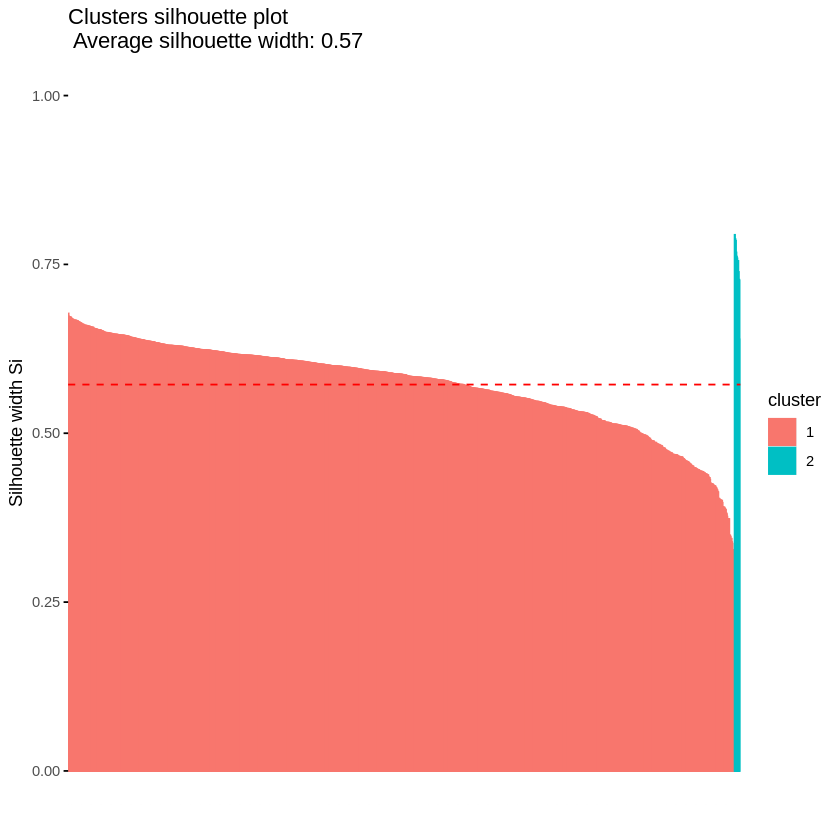

In [ ]:
filtered_data <- wine_scaled[dbscan_best$cluster != 0, ]
filtered_clusters <- dbscan_best$cluster[dbscan_best$cluster != 0]

sil <- silhouette(filtered_clusters, dist(filtered_data))
fviz_silhouette(sil)
cat("✅ Silhouette trung bình:", round(mean(sil[, 3]), 3), "\n")

## Trực quan hóa phân cụm

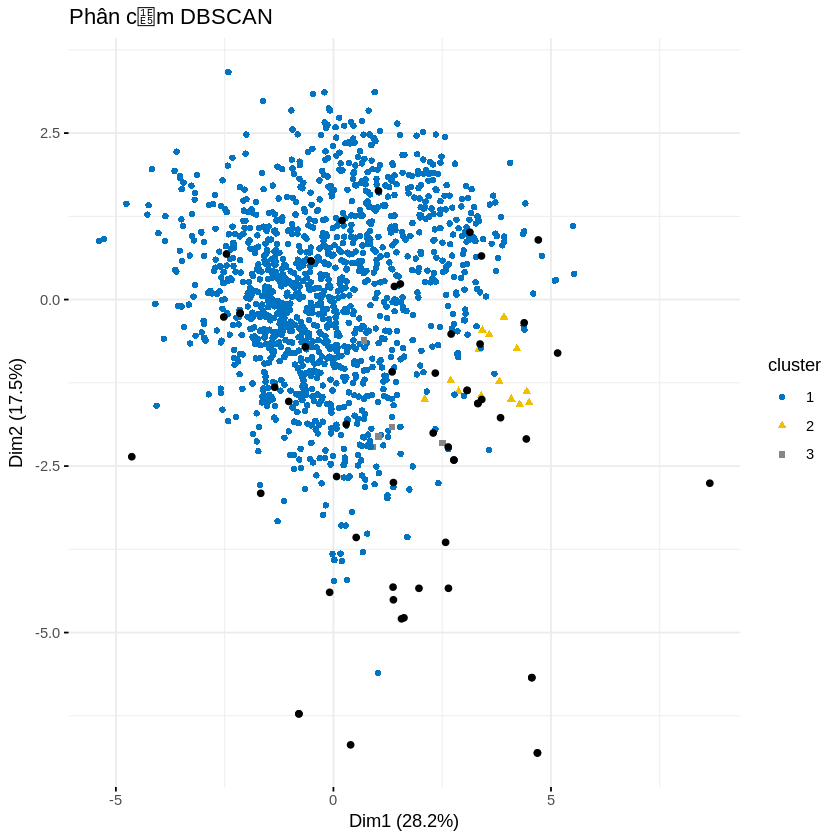

In [ ]:
fviz_cluster(dbscan_result, data = wine_scaled,
             palette = "jco",
             geom = "point",
             ellipse = FALSE,
             show.clust.cent = FALSE,
             main = "Phân cụm DBSCAN",
             ggtheme = theme_minimal())


## BIỂU ĐỒ SỐ LƯỢNG MẪU TRONG MỖI CỤM

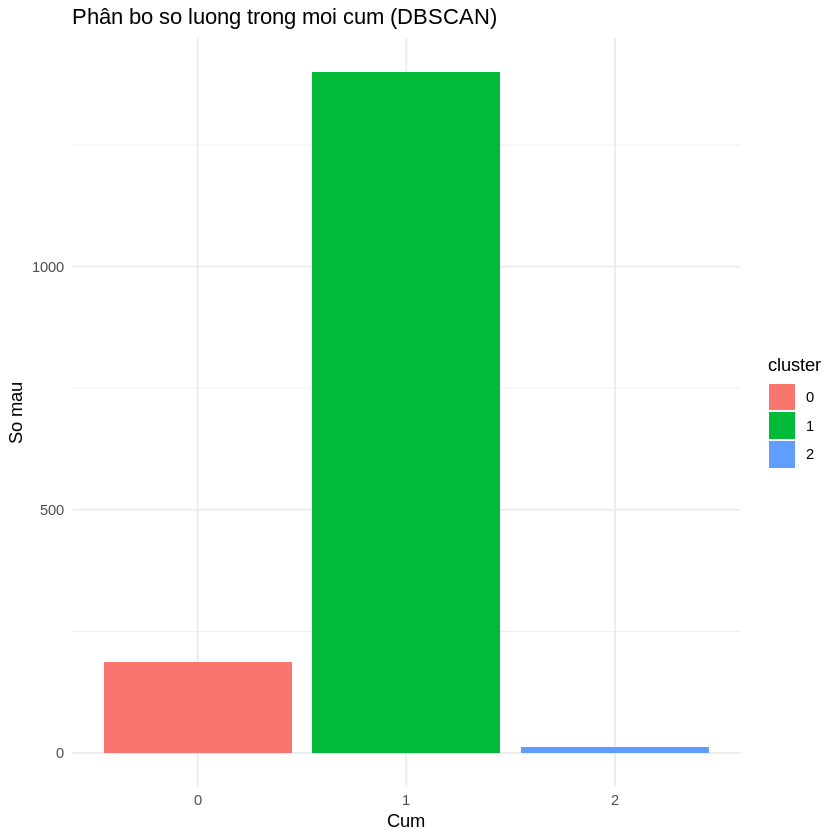

In [ ]:
wine %>%
  count(cluster) %>%
  ggplot(aes(x = cluster, y = n, fill = cluster)) +
  geom_bar(stat = "identity") +
  labs(title = "Phân bo so luong trong moi cum (DBSCAN)",
       x = "Cum", y = "So mau") +
  theme_minimal()


## BIỂU ĐỒ NHIỆT – ĐẶC TRƯNG TRUNG BÌNH THEO CỤM

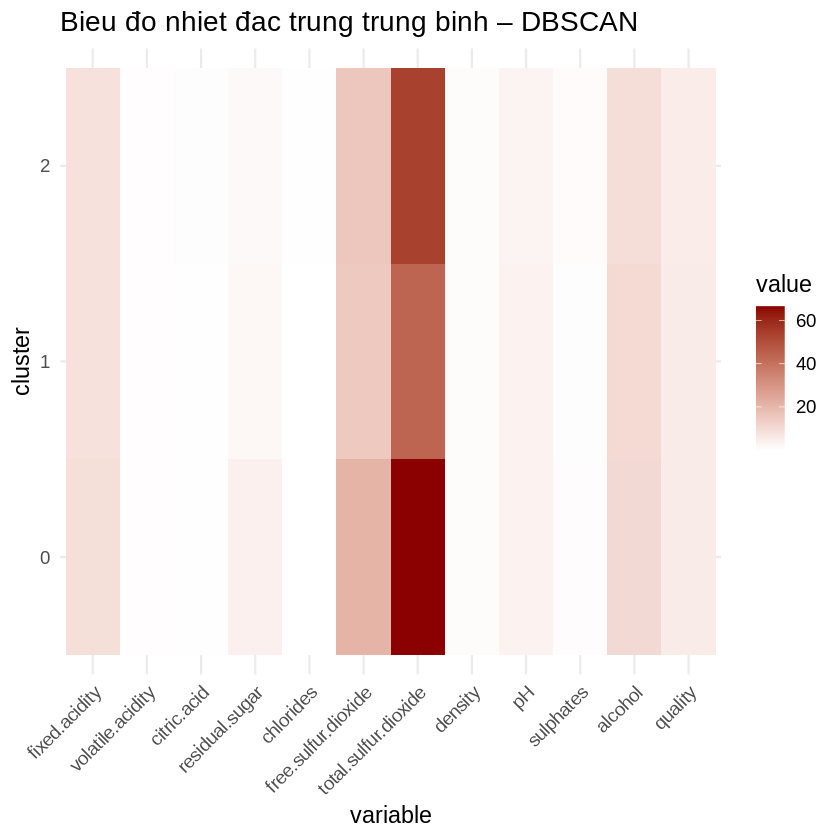

In [ ]:
library(reshape2)

wine$cluster <- as.factor(dbscan_best$cluster)
mean_feats <- wine %>%
  group_by(cluster) %>%
  summarise(across(.cols = where(is.numeric), .fns = mean, na.rm = TRUE))

heatmap_data <- melt(mean_feats, id.vars = "cluster")

ggplot(heatmap_data, aes(x = variable, y = cluster, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "darkred") +
  labs(title = "Bieu đo nhiet đac trung trung binh – DBSCAN") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
